In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from BabyNamesUS.pathnames import raw_namesbystate, filename_dot_txt_by_state_list
from BabyNamesUS.utils_pandas import load_and_concat_list_of_txt

In [2]:
### CONSTANTS
NUM_NAMES=3
CUTOFF_YEAR_BELOW = int(2000)

In [3]:
### LOAD in the data

df_names_by_state_yr = load_and_concat_list_of_txt(
    list_dot_txt_by_state=filename_dot_txt_by_state_list
)

In [4]:


# filter
if False:
    mask = (
        df_names_by_state_yr["year"]>=int(CUTOFF_YEAR_BELOW)
    ) & (
        df_names_by_state_yr["sex"]=="M"
    ) & (
        df_names_by_state_yr["state"]=="TX"
    )

#
mask = (
    df_names_by_state_yr["year"]>=int(CUTOFF_YEAR_BELOW)
) & (
    df_names_by_state_yr["sex"]=="M"
)

df_names_by_state_yr = df_names_by_state_yr[mask].reset_index(drop=True)


In [5]:
df_name_total_all_time = df_names_by_state_yr.groupby("name")["count"].sum().reset_index(drop=False)

In [15]:
df_names_by_yr = df_names_by_state_yr.groupby(["name","year"])[["count"]].sum().reset_index(drop=False)

In [16]:
df_names_by_yr

,name,year,count
0,Aaban,2013,6
1,Aaban,2014,6
2,Aadam,2019,6
3,Aadan,2008,12
4,Aadan,2009,6
...,...,...,...
98425,Zyquan,2010,8
98426,Zyquavious,2010,6
98427,Zyren,2013,6
98428,Zyron,2015,5


In [6]:
top_10_list\
=df_name_total_all_time.sort_values(by=["count"],ascending=False).reset_index(drop=True).loc[:10,]["name"].values.tolist()

In [7]:
top_10_list

['Jacob',
 'Michael',
 'William',
 'Noah',
 'Ethan',
 'Matthew',
 'Daniel',
 'Joshua',
 'Alexander',
 'James',
 'Joseph']

In [14]:
df_names_by_yr.head()

,name,count
0,Aaban,12
1,Aadam,6
2,Aadan,23
3,Aadarsh,11
4,Aaden,4174


Jacob
Michael
William
Noah
Ethan
Matthew
Daniel
Joshua
Alexander
James
Joseph


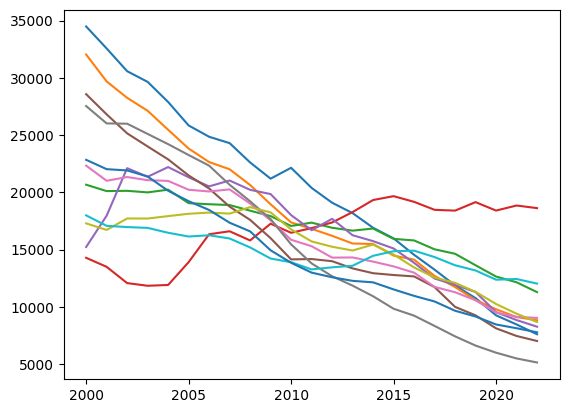

In [17]:
for my_name in top_10_list:
    print(my_name)
    mask = df_names_by_yr["name"] == my_name
    plt.plot(
        df_names_by_yr[mask]["year"],
        df_names_by_yr[mask]["count"]
    )

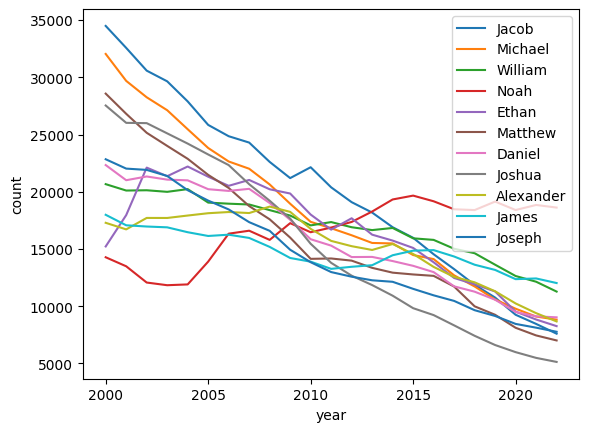

In [20]:
for name in top_10_list:
    mask = df_names_by_yr["name"].values == name
    plt.plot(
        df_names_by_yr[mask]["year"],
        df_names_by_yr[mask]["count"],
        label=name,
    )
    
plt.ylabel("count")
plt.xlabel("year")
plt.legend(loc="upper right")
plt.show()

In [2]:
1-1

0

In [15]:
df_names_by_state_yr.shape

(1273144, 5)

In [10]:
df_names_by_state_yr.shape

(6407990, 5)

In [11]:
df_names_by_state_yr.dtypes

state    object
sex      object
year      int64
name     object
count     int64
dtype: object

In [17]:
plt.plot()

In [18]:
df_names_by_state_yr.head()

,state,sex,year,name,count
0,AK,M,1990,Beau,5
1,AK,M,1990,Carlos,5
2,AK,M,1990,Clayton,5
3,AK,M,1990,Colby,5
4,AK,M,1990,Collin,5


In [10]:
df_names_by_state_yr.groupby("year")["name"].count().reset_index(drop=False)\
.sort_values(
    by=["year"]
)

,year,name
0,1910,16778
1,1911,17621
2,1912,23179
3,1913,25276
4,1914,28822
...,...,...
108,2018,94166
109,2019,94179
110,2020,93048
111,2021,95116


In [3]:
glob.glob(
    pathname=raw_namesbystate,
    recursive=True
)

del pd_dict
pd_list = []
ctr = 0
for my_file in dot_txt_by_state:
    #
    key = my_file.replace(
        '/Users/ajhergenroeder/_git_repos/_kid_names/src/kid_names/datasets/raw_namesbystate/STATE.',
        ''
    ).replace('.TXT', "")

    #
    pd_list.append( 
        pd.read_csv(
            filepath_or_buffer=my_file,
            header=None,
            skiprows=[0],
            names=["state","gender","year","name","count"]
        )
    )
df = pd.concat(pd_list,axis=0)
df.shape

['/Users/ajhergenroeder/_git_repos/_kid_names/src/kid_names/datasets/raw_namesbystate']

In [41]:
df.shape

(6407990, 5)